# Importing necessary libraries and dataset

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [75]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-price-prediction


In [76]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/harishkumardatalab/housing-price-prediction/versions/1/Housing.csv')

In [77]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#Preprocessing Data

In [78]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [79]:
data.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [80]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [81]:
data = data.map(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [82]:
data = pd.get_dummies(data, columns=['mainroad',  'basement',
       'airconditioning', 'prefarea', 'furnishingstatus','guestroom', 'hotwaterheating' ])

In [83]:
data.head(8)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_0,mainroad_1,basement_0,basement_1,...,airconditioning_1,prefarea_0,prefarea_1,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,guestroom_0,guestroom_1,hotwaterheating_0,hotwaterheating_1
0,13300000,7420,4,2,3,2,False,True,True,False,...,True,False,True,True,False,False,True,False,True,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
2,12250000,9960,3,2,2,2,False,True,False,True,...,False,False,True,False,True,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,True,False,False,False,True,True,False
5,10850000,7500,3,3,1,2,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
6,10150000,8580,4,3,4,2,False,True,True,False,...,True,False,True,False,True,False,True,False,True,False
7,10150000,16200,5,3,2,0,False,True,True,False,...,False,True,False,False,False,True,True,False,True,False


In [84]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [85]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_0,mainroad_1,basement_0,basement_1,...,airconditioning_1,prefarea_0,prefarea_1,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,guestroom_0,guestroom_1,hotwaterheating_0,hotwaterheating_1
0,13300000,7420,4,2,3,2,0,1,1,0,...,1,0,1,1,0,0,1,0,1,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
2,12250000,9960,3,2,2,2,0,1,0,1,...,0,0,1,0,1,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,0,1,...,1,0,1,1,0,0,1,0,1,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,1,0,0,0,1,1,0


# Splitting into Train and Test set

In [86]:
X = data.drop('price', axis=1)
y = data['price']

scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

duplicating because dataset is small

In [87]:
import pandas as pd
from sklearn.utils import shuffle

X1 = pd.concat([X, X], axis=0)
y1 = pd.concat([y, y], axis=0)

X_dup = pd.concat([X1, X1], axis=0)
y_dup = pd.concat([y1, y1], axis=0)


X_dup, y_dup = shuffle(X_dup, y_dup, random_state=42)



In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_dup, y_dup, test_size=0.3, random_state=42)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1526, 20)
(654, 20)
(1526,)
(654,)


# Using Different Regression Models

Linear Regresssion

In [90]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = model.predict(X_test)

In [92]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 1096251697471.22
Mean Absolute Error: 770818.16
R2 Score: 0.70


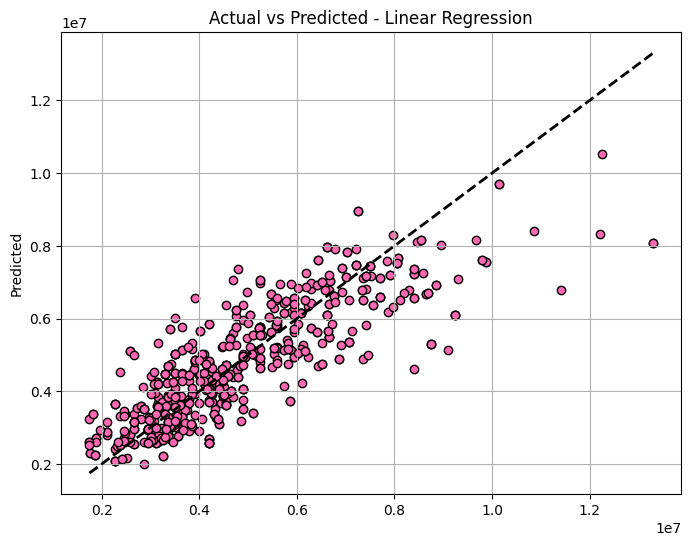

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='hotpink', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression')
plt.grid(True)
plt.show()


Random Forest

In [94]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 65249459750.157684
MAE: 145467.02836501857
R2: 0.9819986414202464


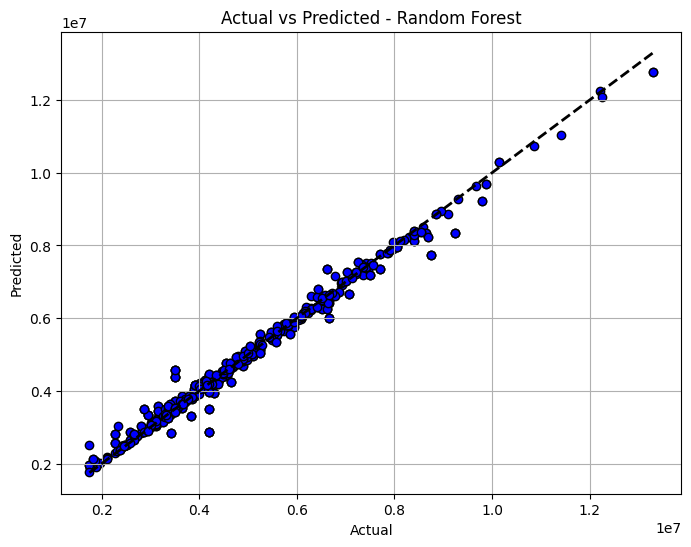

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # ideal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Random Forest')
plt.grid(True)
plt.show()


XGB

In [96]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

MSE: 467877756928.0
MAE: 507580.28125
R2 Score: 0.8709194660186768


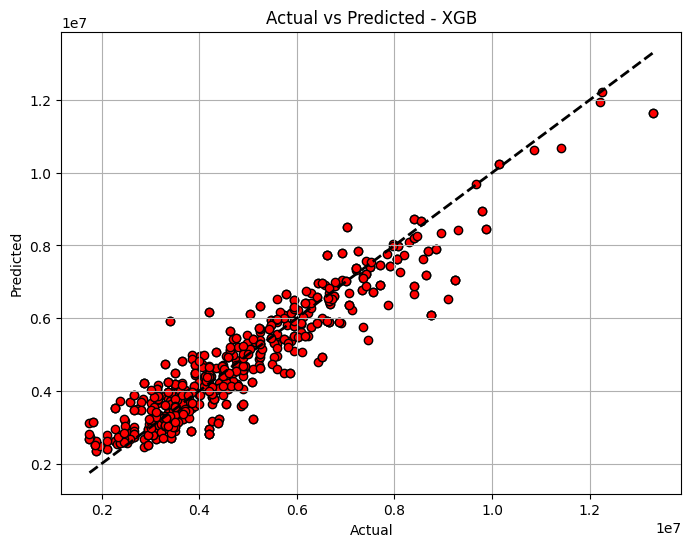

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='red', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # ideal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - XGB')
plt.grid(True)
plt.show()
